In [27]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
application = pd.read_csv('data/application.tsv', delimiter = '\t', usecols=['patent_id','date'])

In [3]:
granted = pd.read_csv('data/patent.tsv', delimiter='\t', usecols=['type','number','date'], dtype={'number':str})

In [4]:
application = application.rename(index = str, columns={'date':'app_date'})

granted = granted.rename(index=str, columns={'date':'grant_date', 'number':'patent_id'})

In [5]:
print(granted.shape, application.shape)

(6657478, 3) (6502933, 2)


In [7]:
master = pd.merge(application, granted, on='patent_id', how='inner')
master.head()

,patent_id,app_date,type,grant_date
0,D345393,1992-12-21,design,1994-03-22
1,5164715,1990-04-10,utility,1992-11-17
2,5177974,1988-06-23,utility,1993-01-12
3,5379515,1994-02-16,utility,1995-01-10
4,5264790,1991-07-01,utility,1993-11-23


In [14]:
#convert to dat
master['app_date'] = pd.to_datetime(master['app_date'], errors='coerce').dt.year

master['grant_date'] = pd.to_datetime(master['grant_date'], errors='coerce').dt.year

In [15]:
master.head()

,patent_id,app_date,type,grant_date
0,D345393,1992.0,design,1994
1,5164715,1990.0,utility,1992
2,5177974,1988.0,utility,1993
3,5379515,1994.0,utility,1995
4,5264790,1991.0,utility,1993


In [19]:
master.isnull().sum()

patent_id     0
app_date      0
type          0
grant_date    0
dtype: int64

In [20]:
master.type.unique()

array(['design', 'utility'], dtype=object)

In [24]:
master['pendency'] = master['grant_date'] - master['app_date']

/home/tiera/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
master.dropna(inplace=True)
master = master.loc[(master['type'].str.match('design') | (master['type'].str.match('utility')))]

master = master.loc[(master['app_date'] >= 1980)]

(0, 5)

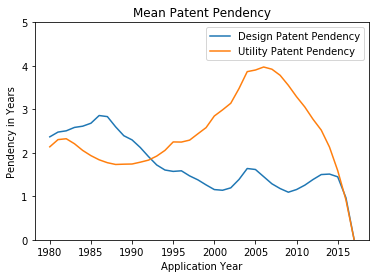

In [42]:
fig, ax = plt.subplots()

master.loc[master['type'].str.match('design')]\
.groupby('app_date')['pendency'].mean().plot(kind='line', label='Design Patent Pendency')
master.loc[master['type'].str.match('utility')]\
.groupby('app_date')['pendency'].mean().plot(kind='line', label='Utility Patent Pendency')

ax.legend()
ax.set_ylabel('Pendency in Years')
ax.set_xlabel('Application Year')
ax.set_title('Mean Patent Pendency')
ax.set_ylim([0,5])